### leer archivo

In [2]:
# instalar librerias en el sistema, mejor en la carpeta del proyecto
# windows 10= 
        # pip install pandas
        # pip install numpy
        # pip install seaborn
        # pip install matplotlib
        # pip install ipython

In [3]:
# importar las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import os
from IPython.display import Image

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\873777436.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#elejir el archivo por consola
def my_name_file():
    #----------------------------------------------------------------
    while True:
        year = input("Que año quieres revisar?: \n")
        try:
            year = int(year)
            print("numero verificado: "+str(year))
            break
        except ValueError:
            print("Esto no es un numero")
    #----------------------------------------------------------------
    while True:
        print("Elije el mes que quieres revisar escribiendo su numero del 1 al 12: \n")

        while True:
            month = input("[1] Enero\n"+"[2] Febrero\n"+"[3] Marzo\n"+
                        "[4] Abril\n"+"[5] Mayo\n"+"[6] Junio\n"+
                        "[7] Julio\n"+"[8] Agosto\n"+"[9] Septiembre\n"+
                        "[10] Octubre\n"+"[11] Noviembre\n"+"[12] Diciembre\n")
            try:
                month = int(month)
                print("numero verificado: "+str(month))
                break
            except ValueError:
                print("Esto no es un numero")

        if month > 0 and month <= 12:
            if month == 1:
                month="January"
            elif month == 2:
                month="February"
            elif month == 3:
                month="March"
            elif month == 4:
                month="April"
            elif month == 5:
                month="May"
            elif month == 6:
                month="June"
            elif month == 7:
                month="July"
            elif month == 8:
                month="August"
            elif month == 9:
                month="September"
            elif month == 10:
                month="October"
            elif month == 11:
                month="November"
            elif month == 12:
                month="December"
            break
        else:
            print("No es un mes valido!\n pruebe de nuevo")
    #----------------------------------------------------------------
    while True:
        while True:
            day = input("Que dia del mes quieres revisar?")
            try:
                day = int(day)
                print("es un numero entero"+str(day))
                break
            except ValueError:
                print("No es un numero entero, pruebe de nuevo")
    
        if day > 0 and day <= 31:
            day = str(day)
            break
        else:
            print("No esta dentro del rango valido de dias")
    #----------------------------------------------------------------
    carta = str(day)+"_"+str(month)+"_"+str(year)
    return(carta)


In [5]:
# traeme el dataset que voy a utilizar en el proyecto
route = "../code_text/loot/"

while True:
    mensaje = my_name_file()
    print(mensaje)
    dataset = "doc_MaterialOxidationMachine_"+mensaje+".txt"

    try:
        df_sensors = pd.read_csv(route+dataset, sep=" ")
        break
    except FileNotFoundError:
        print("Archivo no Encontrado, prueba nuevamente")

# el dataframe es:
df_sensors.head(3)

numero verificado: 2024
Elije el mes que quieres revisar escribiendo su numero del 1 al 12: 

numero verificado: 2
es un numero entero21
21_February_2024


,fecha,hora,temp1,temp2,temp3,nivel
0,21_February_2024,94858,18,18,89,0
1,21_February_2024,94858,18,18,89,0
2,21_February_2024,94858,18,18,89,0


### Atributos del Dataframe

In [6]:
#Atributos del dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df_sensors.dtypes #que tipo de elemento tiene cada columna de dataframe
df_sensors.info #informacion general del dataframe
df_sensors.keys() #debuelebe un array con lostitulos o head del dataframe, primera fila del dataframe
df_sensors.values #devuelve un array conformados de os arrays que contienen los valores de cada fila en el dataframe sin el head
df_sensors.ndim #devuelve el numero de dimenciones del dataframe
df_sensors.size #tamaño total de elementos en el dataframe
df_sensors.shape # total de (filas, columnas)
df_sensors.head(1) #retorna las n primeras filas
df_sensors.tail(2) #retorna las n ultimas filas
df_sensors.describe() #descripcion general estadistica del dataframe
df_sensors.keys()[2] #preguntar por el nombre de una columna especifica
df_sensors.columns[2]
df_sensors.max() #vaores maximos de cada columna
df_sensors.max()[2] #valor maximo de columna especifica
df_sensors.min()[2] #valor minimo de columna especifica

#la media de una clumna especifica, mean no se utiliza cuando hay columnas mixtas en tipo al parecer
df_temp = pd.DataFrame(df_sensors.loc[:, 'temp1'])
df_temp.mean()

df_temp.median() #valor de la mediana



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\3277554933.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sensors.max()[2] #valor maximo de columna especifica
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\3277554933.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sensors.min()[2] #valor minimo de columna especifica


temp1    49.0
dtype: float64

In [7]:
### a ver, los valores que me pueden llegar de la maquina son
"""
    Temperatura sensor cuneta 1
    Temperatura sensor cuneta 2
    valor sensor nivel de agua
    Temperatura agua  tanque
    precencia de Agua? bao nivel o nulo y precencia de agua recomendada o minima para funcionamiento
"""

'\n    Temperatura sensor cuneta 1\n    Temperatura sensor cuneta 2\n    valor sensor nivel de agua\n    Temperatura agua  tanque\n    precencia de Agua? bao nivel o nulo y precencia de agua recomendada o minima para funcionamiento\n'

### Temperatura sensor 1

In [8]:
# temperatura sensor 1

#Dataframe original de donde se extraeran los datos
print( "Columnas del dataframe original: \n"+str (df_sensors.keys()) )
print("Columna que se necesita: \n"+str(df_sensors.keys()[2])+" valor 2")

Columnas del dataframe original: 
Index(['fecha', 'hora', 'temp1', 'temp2', 'temp3', 'nivel'], dtype='object')
Columna que se necesita: 
temp1 valor 2


In [9]:
print("Creando nuevo dataframe")
df_temp = pd.DataFrame(df_sensors.loc[:, ['hora','temp1']])
df_temp.head(3)

Creando nuevo dataframe


,hora,temp1
0,94858,18
1,94858,18
2,94858,18


In [10]:
#Total de datos recogidos
print( "Total de datos registros: \n"+str(df_temp.count()[1]))
#Valor maximo registrado
print("Valor maximo registrados \n"+str( df_temp.max()[1] ) )
# Valor minimo registrado
print("Valor minimo registrados \n"+str( df_temp.min()[1] ) )

Total de datos registros: 
609
Valor maximo registrados 
98
Valor minimo registrados 
0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\160867443.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( "Total de datos registros: \n"+str(df_temp.count()[1]))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\160867443.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Valor maximo registrados \n"+str( df_temp.max()[1] ) )
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\160867443.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

In [11]:
array_temp = []
array_hour = []
max_values_temp = df_temp.count()[1]
#max_values_temp = len(df_sensors.loc[:, 'temp'])

for i in range(0, max_values_temp):
    array_temp.append(df_temp.loc[:,'temp1'][i])
    array_hour.append(df_temp.loc[:,'hora'][i])

print("tamaño deldataframe columna temp: "+str(max_values_temp))
print( "tamaño del array: "+str(len(array_temp)) )
df_aux = pd.DataFrame(array_temp)

tamaño deldataframe columna temp: 609
tamaño del array: 609


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\3457099674.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_values_temp = df_temp.count()[1]


In [12]:
# valor medio registrado
print("valor medio registrados \n"+str(df_aux.mean()) )
# valor mediano registrado
print("Valor mediano registrado: \n"+str(df_aux.median()))

valor medio registrados 
0    48.755337
dtype: float64
Valor mediano registrado: 
0    49.0
dtype: float64


In [26]:
import math

deci1, hora_min = math.modf( (int(df_temp.min()[0]))/10000 ) #columna de hora
deci2, hora_max = math.modf( (int(df_temp.max()[0]))/10000 ) #columna de hora

while True:
    print("La hora minima de este registro es: "+str(hora_min))
    print("La hora maxima de este registro es: "+str(hora_max))

    while True:
        init_hour = input("Selecciona una hora de inicio en formato 24h que quieras graficar: ")
        try:
            init_hour = int(init_hour)
            break
        except ValueError:
            print("Esto no es un numero, prueba de nuevo")

    # print(init_hour)
    # print(type(init_hour))
    # break

    if init_hour >= hora_min and init_hour <= hora_max:
        print("Hora de inicio aceptada: "+str(init_hour))
        break
    else:
        print("Tiene que estar la hora de inicio entre la hora minima y la hora maxima del registro")

while True:
    print("La hora minima de este registro es: "+str(hora_min))
    print("La hora maxima de este registro es: "+str(hora_max))

    while True:
        finish_hour = input("Selecciona una hora de finalizacion en formato 24h que quieras graficar: ")
        try:
            finish_hour = int(finish_hour)
            break
        except ValueError:
            print("Esto no es un numero, prueba de nuevo")

    if finish_hour >= hora_min and finish_hour <= hora_max:
        print("Hora de Finalizacion aceptada: "+str(finish_hour))
        break
    else:
        print("Tiene que estar la hora de finalizacion entre la hora minima y la hora maxima del registro")



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\3174670727.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deci1, hora_min = math.modf( (int(df_temp.min()[0]))/10000 ) #columna de hora
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\3174670727.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deci2, hora_max = math.modf( (int(df_temp.max()[0]))/10000 ) #columna de hora


La hora minima de este registro es: 9.0
La hora maxima de este registro es: 11.0
Hora de inicio aceptada: 9
La hora minima de este registro es: 9.0
La hora maxima de este registro es: 11.0
Hora de Finalizacion aceptada: 9


In [47]:
# aqui lllegan las variables init_hour y finish_hour

init    = int(init_hour) * 10000
finish  = int(finish_hour) * 10000

array_temp = []
array_hour = []
max_values_temp = df_temp.count()[1]
#max_values_temp = len(df_sensors.loc[:, 'temp'])

for i in range(0, max_values_temp):
    if df_temp.loc[:,'hora'][i] >= init and df_temp.loc[:,'hora'][i] <= (init+10999): 
        array_temp.append(df_temp.loc[:,'temp1'][i])
        array_hour.append(df_temp.loc[:,'hora'][i])

    elif df_temp.loc[:,'hora'][i] >= finish and df_temp.loc[:,'hora'][i] <= (finish+10999):
        array_temp.append(df_temp.loc[:,'temp1'][i])
        array_hour.append(df_temp.loc[:,'hora'][i])

print("tamaño deldataframe columna temp: "+str(max_values_temp))
print( "tamaño del array: "+str(len(array_temp)) )
print( init )
print( finish )
#df_aux = pd.DataFrame(array_temp)

tamaño deldataframe columna temp: 609
tamaño del array: 405
90000
90000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8232\4148276925.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_values_temp = df_temp.count()[1]


Text(0.5, 1.0, 'Historial de Registro de Temperatura\nHora Inicio: 9:00:00 Hora Final: 9:00:00')

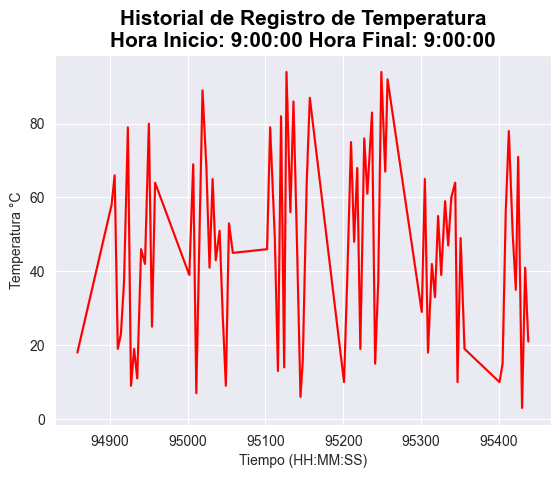

In [52]:
# aqui lllegan las variables init_hour y finish_hour

import numpy as np

x = np.array(array_hour)
y = np.array(array_temp)
# Conjunto de datos
df = {'Tiempo (HH:MM:SS)': x, 'Temperatura °C': y}
sns.set_style("darkgrid")
sns.lineplot(x="Tiempo (HH:MM:SS)",
             y="Temperatura °C", 
             data=df, 
             markers="o", 
             color="red").set_title("Historial de Registro de Temperatura\n"+
                                    "Hora Inicio: "+str(init_hour)+":00:00"
                                    " Hora Final: "+str(finish_hour)+":00:00", 
                                    fontdict = {"fontsize": 15,
                                    "fontweight":"bold",
                                    "color":"black"})



In [16]:
type(y)

numpy.ndarray

In [17]:
df_temp.dtypes

hora     int64
temp1    int64
dtype: object

In [18]:
# Temperatura sensor 2

In [19]:
# Temperatura Tanque

In [20]:
# Nivel de agua